<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PS1                    2205 non-null   float64
 1   PS2                    2205 non-null   float64
 2   PS3                    2205 non-null   float64
 3   PS4                    2205 non-null   float64
 4   PS5                    2205 non-null   float64
 5   PS6                    2205 non-null   float64
 6   ESP1                   2205 non-null   float64
 7   FS1                    2205 non-null   float64
 8   FS2                    2205 non-null   float64
 9   TS1                    2205 non-null   float64
 10  TS2                    2205 non-null   float64
 11  TS3                    2205 non-null   float64
 12  TS4                    2205 non-null   float64
 13  VS1                    2205 non-null   float64
 14  CE                     2205 non-null   float64
 15  CP  

C:\Users\SystemDynamicsLab\AppData\Local\Temp\ipykernel_11600\1813840303.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_corr_target.drop(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],axis=0,inplace=True)


,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


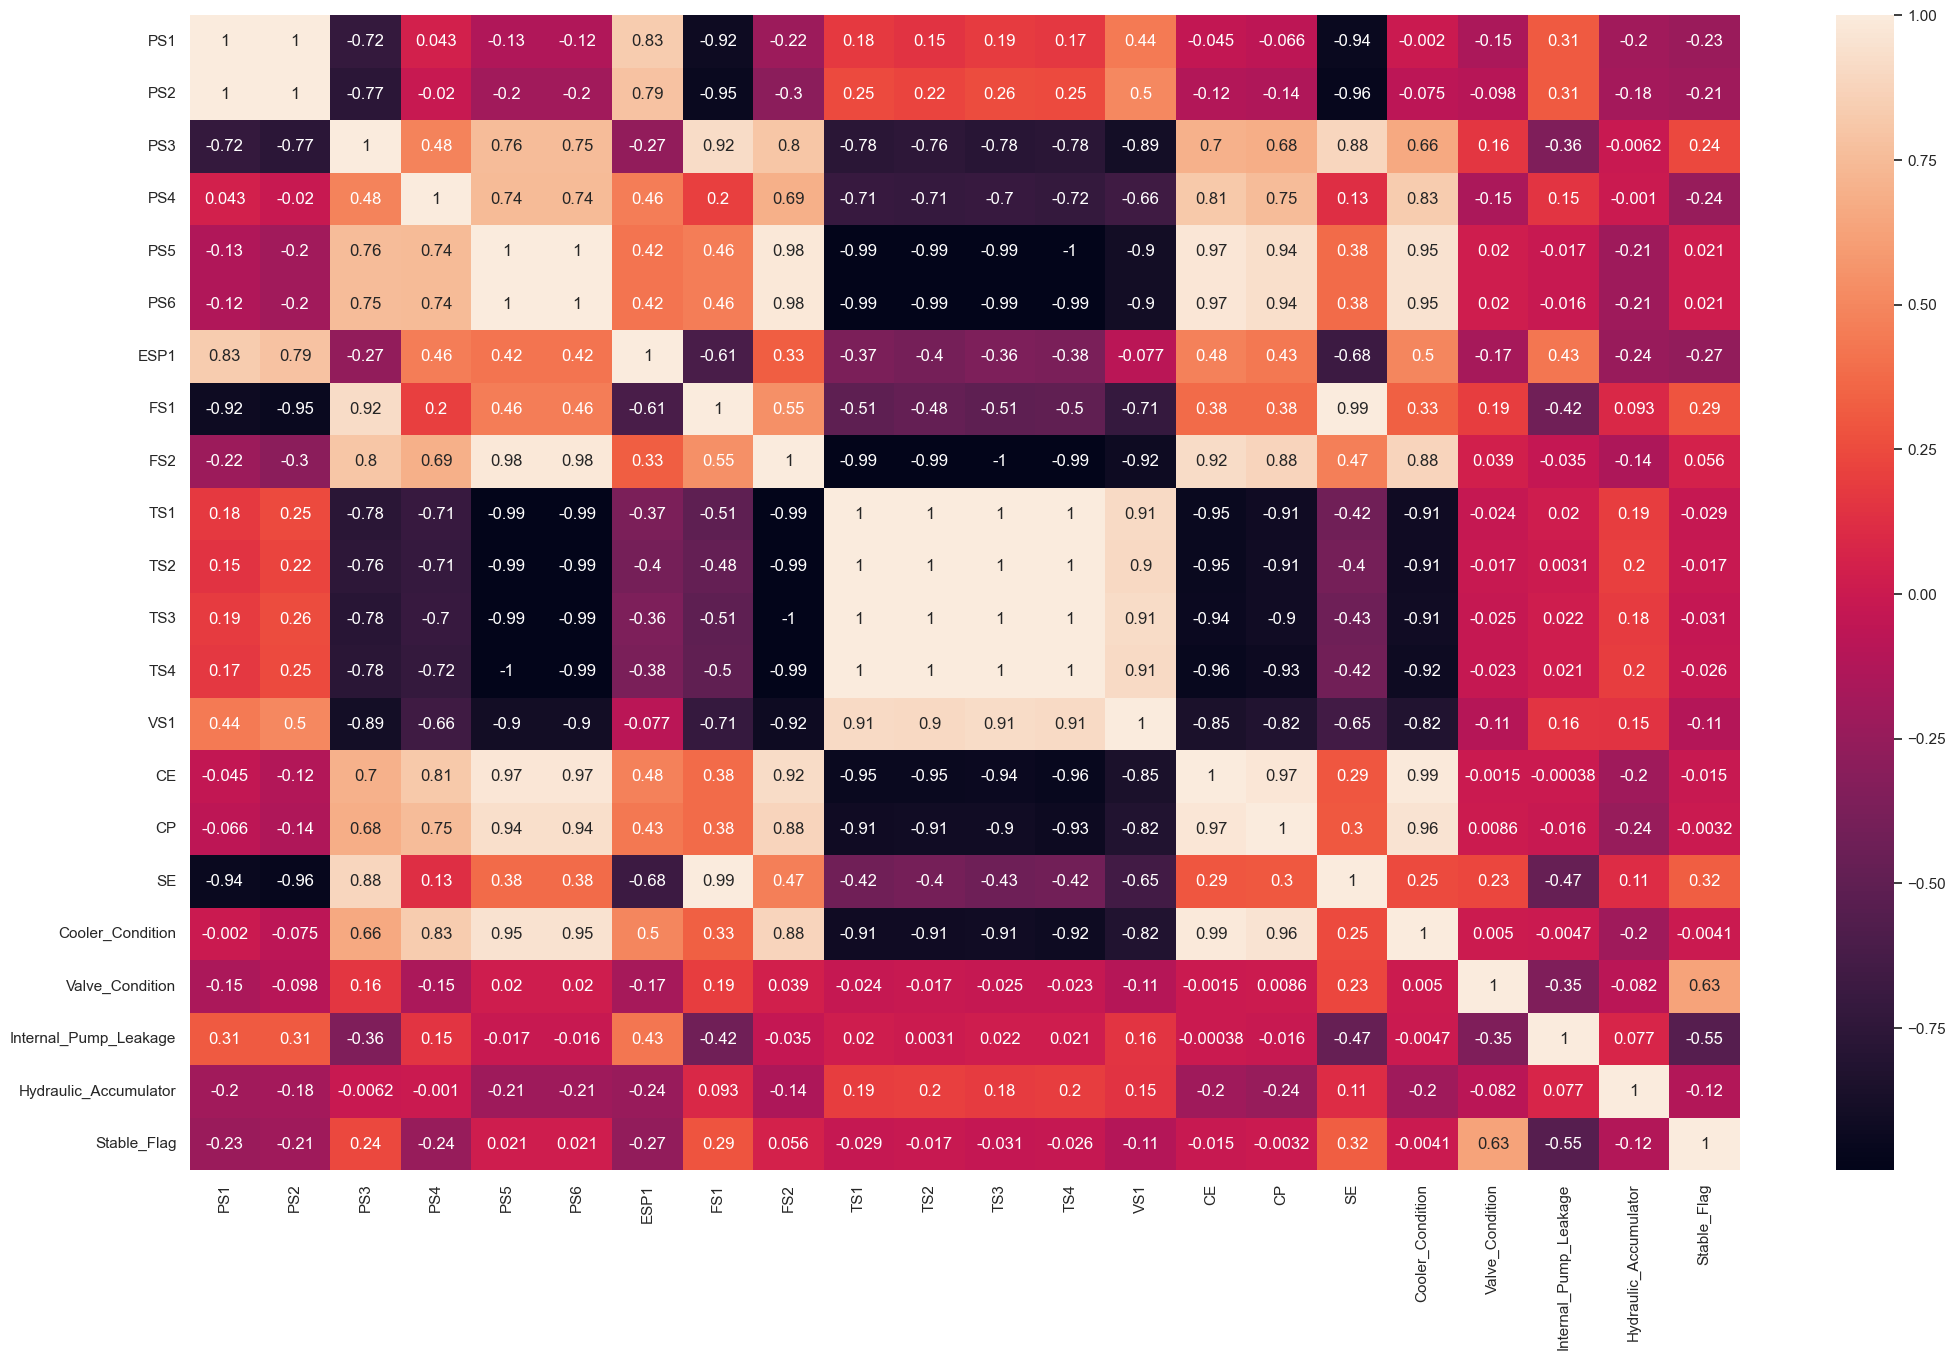

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV
from tpot import TPOTClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data Uploading

# 1- Data Preperation

ps1=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS1.txt")

ps1

ps1.shape

np.isnan(ps1).sum()

ps2=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS2.txt")

ps3=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS3.txt")

ps4=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS4.txt")

ps5=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS5.txt")

ps6=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS6.txt")

ps2

ps1_arr=ps1.mean(axis=1)
ps1_arr

ps2_arr=ps2.mean(axis=1)
ps2_arr

ps3_arr=ps3.mean(axis=1)
ps3_arr

ps4_arr=ps4.mean(axis=1)
ps4_arr

ps5_arr=ps5.mean(axis=1)
ps5_arr

ps6_arr=ps6.mean(axis=1)
ps6_arr

df=pd.DataFrame({"PS1":ps1_arr,"PS2":ps2_arr,"PS3":ps3_arr,"PS4":ps4_arr,"PS5":ps5_arr,"PS6":ps6_arr})

df.head()

eps1=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/EPS1.txt")

esp1_arr=eps1.mean(axis=1)
esp1_arr

df["ESP1"]=esp1_arr

df.head()

a=[]
for i in ["FS1","FS2"]:
    FS=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive"+"/"+i+".txt")
    a.append(FS)
fs1,fs2=a

fs1_arr=fs1.mean(axis=1)
fs1_arr

fs2_arr=fs2.mean(axis=1)
fs2_arr

df["FS1"]=fs1_arr
df["FS2"]=fs2_arr

df.head()

a=[]
for i in ["TS1","TS2","TS3","TS4"]:
    TS=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive"+"/"+i+".txt")
    a.append(TS)
ts1,ts2,ts3,ts4=a

ts1_arr=ts1.mean(axis=1)
ts1_arr

ts2_arr=ts2.mean(axis=1)
ts2_arr

ts3_arr=ts3.mean(axis=1)
ts3_arr

ts4_arr=ts4.mean(axis=1)
ts4_arr

df["TS1"]=ts1_arr
df["TS2"]=ts2_arr
df["TS3"]=ts3_arr
df["TS4"]=ts4_arr

df.head()

vs1=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/VS1.txt")

vs1

vs1_arr=vs1.mean(axis=1)
vs1_arr

df["VS1"]=vs1_arr

df.head()

a=[]
for i in ["CE","CP"]:
    C=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive"+"/"+i+".txt")
    a.append(C)
ce,cp=a

ce_arr=ce.mean(axis=1)
ce_arr

cp_arr=cp.mean(axis=1)
cp_arr

df["CE"]=ce_arr
df["CP"]=cp_arr

df.head()

se=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/SE.txt")

se_arr=se.mean(axis=1)
se_arr

df["SE"]=se_arr

df.head()

target=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/profile.txt")

target

target.shape

df_temp=pd.DataFrame(target,columns=["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"])
df_temp.head()

df_final=pd.concat([df,df_temp],axis=1)

df_final.head(20)



df_final.info()

df_final.describe()

# 2- Data Analysis

df_final.var()

df_final.corr()

fig=plt.gcf()
fig.set_size_inches((25,15))
sns.heatmap(df_final.corr(),annot=True)

# fig.savefig("corr.png")

df_final_corr=df_final.corr().sort_values(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],ascending=False)
df_final_corr.head()

df_final_corr_target=df_final_corr[["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"]]
df_final_corr_target.drop(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],axis=0,inplace=True)

df_final_corr_target

# 3- Data Preprocessing

x=df_final.iloc[:,:-5]

x.head(2)

y=df_final.iloc[:,-5:]

y.head(2)

target_1=y.iloc[:,-5]
target_2=y.iloc[:,-4]
target_3=y.iloc[:,-3]
target_4=y.iloc[:,-2]
final_target=y.iloc[:,-1]
final_target=(final_target.astype(int))

target_1

x.head()

## data splitting target-1

### target incidence



# # Increase the epochs to 100
# history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

# # Plot training & validation accuracy values
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='upper left')

# # Plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(loc='upper left')

# plt.show()


In [2]:
x2 = df.iloc[:, [6,7]]

X_train1,X_test1,y_train1,y_test1=train_test_split(x2,target_3,test_size=0.2,random_state=1)

In [3]:
x3 = df.iloc[:, [0,1,2,4,5,16]]

X_train2,X_test2,y_train2,y_test2=train_test_split(x3,target_2,test_size=0.2,random_state=1)

In [4]:
y_train2 = y_train2.replace({100: 3, 90: 2, 80: 1,73: 0})
y_test2 = y_test2.replace({100: 3, 90: 2, 80: 1,73: 0})

In [5]:
# Correlation matrix for X_train1
corr_matrix_X_train1 = X_train1.corr()

# Correlation matrix for X_train2
corr_matrix_X_train2 = X_train2.corr()


In [6]:
print("Correlation Matrix for X_train1:")
print(corr_matrix_X_train1)

print("\nCorrelation Matrix for X_train2:")
print(corr_matrix_X_train2)


Correlation Matrix for X_train1:
         ESP1      FS1
ESP1  1.00000 -0.60967
FS1  -0.60967  1.00000

Correlation Matrix for X_train2:
          PS1       PS2       PS3       PS5       PS6        SE
PS1  1.000000  0.995304 -0.719514 -0.127130 -0.125742 -0.944003
PS2  0.995304  1.000000 -0.767884 -0.202740 -0.201360 -0.958442
PS3 -0.719514 -0.767884  1.000000  0.757452  0.756537  0.884172
PS5 -0.127130 -0.202740  0.757452  1.000000  0.999993  0.380257
PS6 -0.125742 -0.201360  0.756537  0.999993  1.000000  0.378965
SE  -0.944003 -0.958442  0.884172  0.380257  0.378965  1.000000


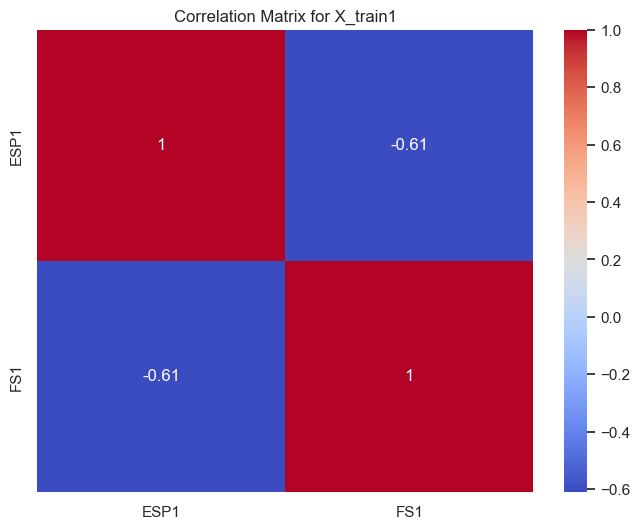

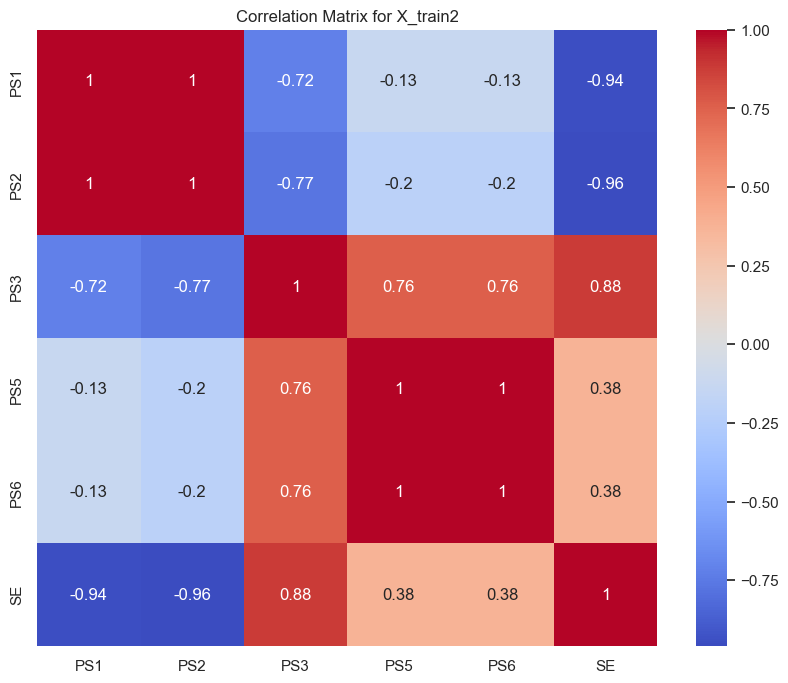

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for X_train1
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_X_train1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for X_train1')
plt.show()

# Heatmap for X_train2
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_X_train2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for X_train2')
plt.show()


In [8]:
# Concatenating both datasets along the column axis
combined_X_train = pd.concat([X_train1, X_train2], axis=1)

# Calculate the correlation matrix
corr_matrix_combined = combined_X_train.corr()

# Display the correlation matrix
print("Correlation Matrix for combined X_train1 and X_train2:")
print(corr_matrix_combined)


Correlation Matrix for combined X_train1 and X_train2:
          ESP1       FS1       PS1       PS2       PS3       PS5       PS6  \
ESP1  1.000000 -0.609670  0.833225  0.789513 -0.270001  0.414820  0.416016   
FS1  -0.609670  1.000000 -0.923771 -0.946550  0.921268  0.463536  0.462290   
PS1   0.833225 -0.923771  1.000000  0.995304 -0.719514 -0.127130 -0.125742   
PS2   0.789513 -0.946550  0.995304  1.000000 -0.767884 -0.202740 -0.201360   
PS3  -0.270001  0.921268 -0.719514 -0.767884  1.000000  0.757452  0.756537   
PS5   0.414820  0.463536 -0.127130 -0.202740  0.757452  1.000000  0.999993   
PS6   0.416016  0.462290 -0.125742 -0.201360  0.756537  0.999993  1.000000   
SE   -0.678963  0.994637 -0.944003 -0.958442  0.884172  0.380257  0.378965   

            SE  
ESP1 -0.678963  
FS1   0.994637  
PS1  -0.944003  
PS2  -0.958442  
PS3   0.884172  
PS5   0.380257  
PS6   0.378965  
SE    1.000000  


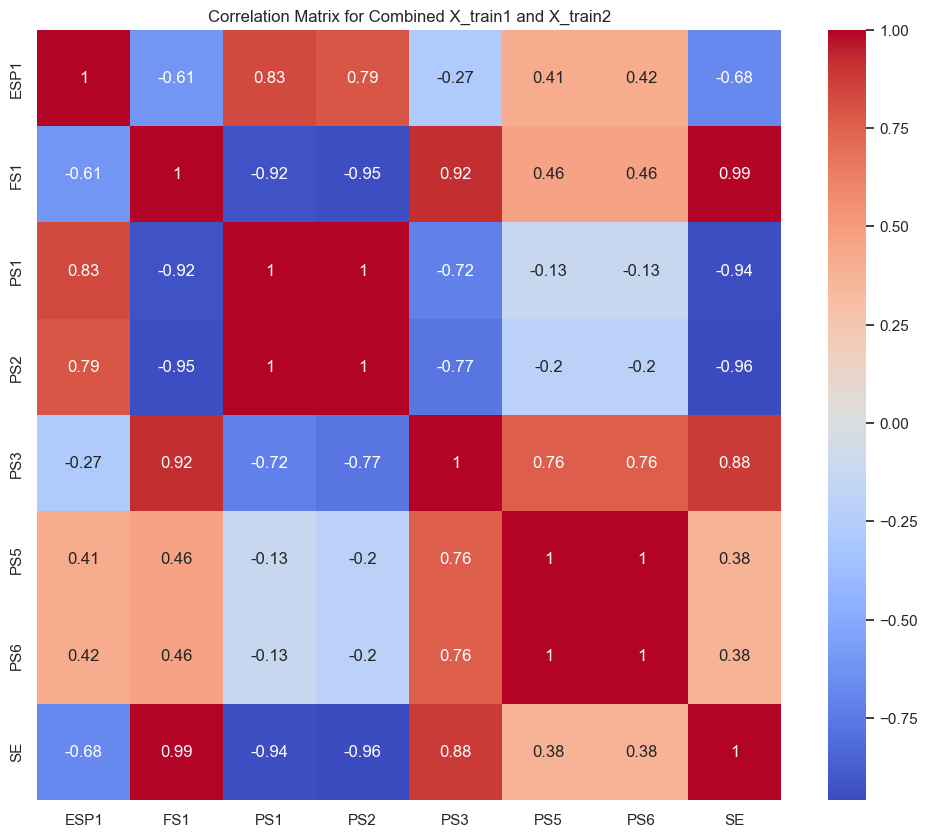

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for the combined dataset
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_combined, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Combined X_train1 and X_train2')
plt.show()


In [10]:
# Combine feature sets and targets into one DataFrame
combined_train = pd.concat([X_train1, X_train2, y_train1, y_train2], axis=1)

# Rename the target columns for clarity
combined_train.columns = list(X_train1.columns) + list(X_train2.columns) + ['Target1', 'Target2']

# Calculate the correlation matrix
corr_matrix_combined = combined_train.corr()

# Display the correlation matrix
print("Correlation Matrix for combined X_train1, X_train2, and Targets:")
print(corr_matrix_combined)


Correlation Matrix for combined X_train1, X_train2, and Targets:
             ESP1       FS1       PS1       PS2       PS3       PS5       PS6  \
ESP1     1.000000 -0.609670  0.833225  0.789513 -0.270001  0.414820  0.416016   
FS1     -0.609670  1.000000 -0.923771 -0.946550  0.921268  0.463536  0.462290   
PS1      0.833225 -0.923771  1.000000  0.995304 -0.719514 -0.127130 -0.125742   
PS2      0.789513 -0.946550  0.995304  1.000000 -0.767884 -0.202740 -0.201360   
PS3     -0.270001  0.921268 -0.719514 -0.767884  1.000000  0.757452  0.756537   
PS5      0.414820  0.463536 -0.127130 -0.202740  0.757452  1.000000  0.999993   
PS6      0.416016  0.462290 -0.125742 -0.201360  0.756537  0.999993  1.000000   
SE      -0.678963  0.994637 -0.944003 -0.958442  0.884172  0.380257  0.378965   
Target1  0.426184 -0.432340  0.320691  0.319987 -0.365238 -0.029696 -0.029367   
Target2 -0.173823  0.187611 -0.153572 -0.099110  0.159496  0.018428  0.018407   

               SE   Target1   Target2  
ESP

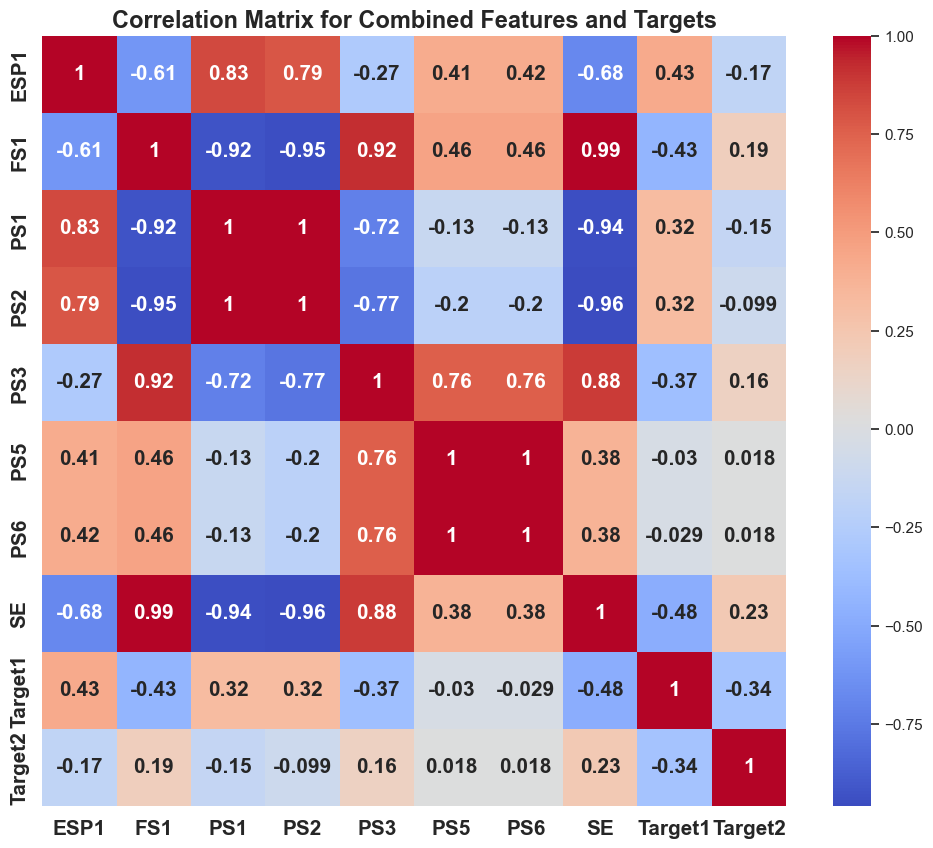

'C:\\Users\\SystemDynamicsLab\\OneDrive - IIT Indore\\Pictures\\Camera Roll\\pumpleakage_fs1.svg'

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(12, 10))

# Modify font weight to make the annotations bold
sns.heatmap(corr_matrix_combined, annot=True, cmap='coolwarm', annot_kws={"weight": "bold", "size":"15"})

# Set the title with bold font weight
plt.title('Correlation Matrix for Combined Features and Targets', fontsize=17, fontweight='bold')

# Set bold x and y axis labels
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')

output_path = r"C:\Users\SystemDynamicsLab\OneDrive - IIT Indore\Pictures\Camera Roll\pumpleakage_fs1.svg"
plt.savefig(output_path, dpi=1000, bbox_inches='tight')

plt.show()
output_path
